In [1]:
from descriptors.acsf import acsf

r_cut = 10
obj = acsf.TwoBodyACSF(['O','O'],r_cutoff=r_cut,nb_param_pairs=15)
params_wip = obj.get_two_body_parameters()

In [2]:
params = []
for param in params_wip:
    param.append(r_cut)
    param = [float(x) for x in param]
    params.append(param)
print(params)

[[57.47, 0.6667, 10.0], [40.05, 0.7986, 10.0], [27.92, 0.9566, 10.0], [19.45, 1.146, 10.0], [13.56, 1.373, 10.0], [9.449, 1.644, 10.0], [6.586, 1.969, 10.0], [4.59, 2.359, 10.0], [3.199, 2.826, 10.0], [2.229, 3.385, 10.0], [1.554, 4.055, 10.0], [1.083, 4.857, 10.0], [0.7546, 5.818, 10.0], [0.5259, 6.969, 10.0], [0.3665, 8.348, 10.0]]


<ipython-input-12-ee9e95ac672c>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


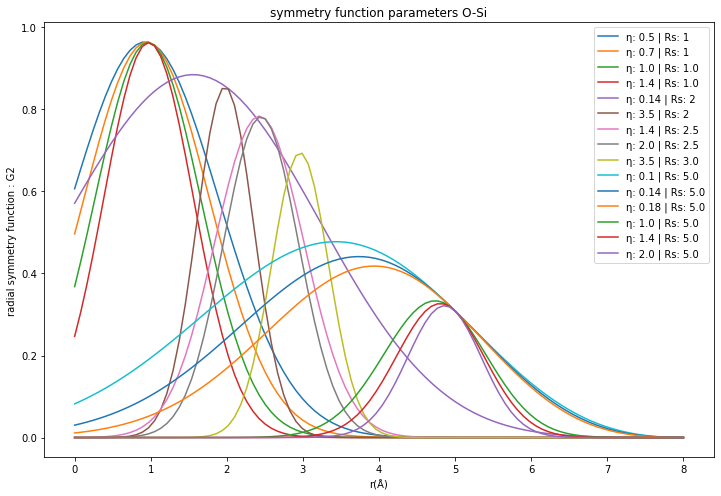

In [12]:
from descriptors.acsf.sf_function import SymmetryFunction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use({'figure.facecolor':'white'})
def plot_sf(sf_parameters, bond, save_dir = None):
    r_cut_list = [];
    for param in sf_parameters:
        r_cut_list.append(param[-1])
    r_cut = max(r_cut_list)
    acsf = SymmetryFunction()
    r_ij = np.linspace(0, r_cut, 100)
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.set_title(f'symmetry function parameters {bond}')
    ax.set_xlabel(f'r(Å)')
    ax.set_ylabel(f'radial symmetry function : G2')
    for param in sf_parameters:
        ax.plot(r_ij,
                [acsf.radial_symmetry_function_2(eta=param[0], r_ij=k, r_shift=param[1], r_cutoff=param[2]) for k in
                 r_ij], label=f'η: {param[0]} | Rs: {param[1]}')
    ax.legend()
    if save_dir is not None:
        fig.savefig(f'{save_dir}/sf.png')
    fig.show()
plot_sf(params,'O-Si')

<ipython-input-12-ee9e95ac672c>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


symfunction_short O  2 Si 0.5 1 8
symfunction_short O  2 Si 0.7 1 8
symfunction_short O  2 Si 1.0 1.0 8
symfunction_short O  2 Si 1.4 1.0 8
symfunction_short O  2 Si 0.14 2 8
symfunction_short O  2 Si 3.5 2 8
symfunction_short O  2 Si 1.4 2.5 8
symfunction_short O  2 Si 2.0 2.5 8
symfunction_short O  2 Si 3.5 3.0 8
symfunction_short O  2 Si 0.1 5.0 8
symfunction_short O  2 Si 0.14 5.0 8
symfunction_short O  2 Si 0.18 5.0 8
symfunction_short O  2 Si 1.0 5.0 8
symfunction_short O  2 Si 1.4 5.0 8
symfunction_short O  2 Si 2.0 5.0 8


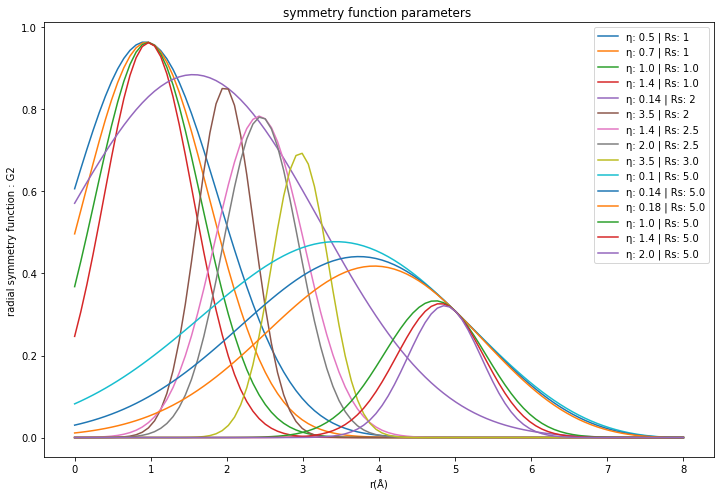

In [13]:
params = [
    [0.5, 1, 8],
    [0.7, 1, 8],
    [1.0, 1.0, 8],
    [1.4, 1.0, 8],
    [0.14, 2, 8],
    [3.5, 2, 8],
    [1.4, 2.5, 8],
    [2.0, 2.5, 8],
    [3.5, 3.0, 8],
    [0.1, 5.0, 8],
    [0.14, 5.0, 8],
    [0.18, 5.0, 8],
    [1.0, 5.0, 8],
    [1.4, 5.0, 8],
    [2.0, 5.0, 8],
]
save_dir = '/Users/y1u0d2/desktop/Lab/result/sf'
plot_sf(params, '', save_dir)
for param in params:
     print(f'symfunction_short O  2 Si {param[0]} {param[1]} {param[2]}')
